# Scientific Exploration of Diwali Sales Analysis

# Table of Contents

# 1. Problem Statement

#### Analyzing consumer behavior and purchasing patterns to identify key market segments and optimize product offerings for Diwali Sales.

# 2. Objective

#### To understand the buying behavior and preferences of consumers based on gender, age, location, marital status, and industry to improve marketing strategies and increase sales.

# 3. Installing & Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install -q pandas-profiling
from pandas_profiling import ProfileReport

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 78.9 MB/s eta 0:00:00


<ipython-input-1-ab475a770950>:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


#4. Data Acquisition & Description

The data was collected from Kaggle and made available by Mr. Rishabh Mishra.

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/GitHub_Project/Youtube_datasets/Diwali Sales Data.csv'
df = pd.read_csv(path, encoding='latin1')

In [ ]:
print(df.shape)
df.head()

(11251, 15)


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **description** and **statistics** about the data.

In [ ]:
df.describe()

,User_ID,Age,Orders,Amount
count,1.123100e+04,11231.000000,11231.000000,11231.000000
mean,1.003004e+06,35.411985,2.489093,9454.084982
std,1.716055e+03,12.756116,1.114880,5221.728776
min,1.000001e+06,12.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,2.000000,5443.000000
50%,1.003065e+06,33.000000,2.000000,8109.000000
75%,1.004428e+06,43.000000,3.000000,12677.500000
max,1.006040e+06,92.000000,4.000000,23952.000000


## Observations
### *Age*:
#### Average age present in data is around 35.
#### 25% of the customers have age greater than 43.
#### 50% of the customers have age greater than 33.
#### 75% of the customers have age greater than 27.
### *Orders*:
#### Average order placed per person is between 2 to 3.
#### 75% customers placed more than 2 orders.
### *Amount*:
#### Average Amount spent per person is 9454.08.
#### 75% of the customers spent amount more than 5443.00.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


#Observations
#### Amount column has null values present in it, which needs to be dealt with.
#### Status and unnamed1 columns have 0 values present in it, these columns needs to be dropped.
#### No discrepancy present in type of the data.

#5. Data Pre-Profiling

In [ ]:
profile = ProfileReport(df=df)  # It is df = data, not data = df
profile.to_file('Pre Profiling Report.html')
print('Accomplished!')

# Pre-profiling observations
#### There are 11251 observations and 15 features.
#### There are 10 categorical, 3 numeric and 2 unsupported types of features.
#### There are 	22514(13.3%) missing cells present in the data.
#### There are 8 duplicate rows.


# 6. Data Cleaning

### 6.1 Dropping unnecessary columns

In [ ]:
df = df.drop(['Status', 'unnamed1'], axis=1) # To drop columns Status and unnamed1 as they don't have any values present in it

In [ ]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

### 6.2 Dropping null values

In [ ]:
df.dropna(subset=['Amount'], inplace=True)

In [ ]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

# 6.3 Find Duplicates

In [ ]:
df.shape

(11239, 13)

In [ ]:
df[df.duplicated(keep=False)]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
18,1001883,Praneet,P00029842,M,51-55,54,1,Uttar Pradesh,Central,Hospitality,Auto,1,23568.0
19,1001883,Praneet,P00029842,M,51-55,54,1,Uttar Pradesh,Central,Hospitality,Auto,1,23568.0
4403,1004725,Jackson,P00150842,F,36-45,37,1,Maharashtra,Western,Hospitality,Electronics & Gadgets,4,9859.0
4404,1004725,Jackson,P00150842,F,36-45,37,1,Maharashtra,Western,Hospitality,Electronics & Gadgets,4,9859.0
5702,1003208,Bowman,P00171642,F,26-35,31,0,Bihar,Eastern,Agriculture,Electronics & Gadgets,4,8088.0
5703,1003208,Bowman,P00171642,F,26-35,31,0,Bihar,Eastern,Agriculture,Electronics & Gadgets,4,8088.0
5907,1001260,Dheeraj,P00344042,M,26-35,28,0,Maharashtra,Western,IT Sector,Electronics & Gadgets,4,8015.0
5908,1001260,Dheeraj,P00344042,M,26-35,28,0,Maharashtra,Western,IT Sector,Electronics & Gadgets,4,8015.0
6172,1001325,Reese,P00111742,F,26-35,27,1,Gujarat,Western,Construction,Electronics & Gadgets,3,7923.0
6173,1001325,Reese,P00111742,F,26-35,27,1,Gujarat,Western,Construction,Electronics & Gadgets,3,7923.0


In [ ]:
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
df.shape

(11231, 13)

# 6.4 Renaming column

In [ ]:
df.rename(columns={'Marital_Status':'Marriage'}, inplace=True)

In [ ]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marriage,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


# 6.5 Converting values from column Marriage.
### 0 as 'No' and 1 as 'Yes' for better visualization in Exploratory Data Analysis.

In [ ]:
df['Marriage'].unique()

array([0, 1])

In [ ]:
df.loc[df['Marriage'] == 0,'Marriage'] = 'No'

In [ ]:
df.loc[df['Marriage'] == 1,'Marriage'] = 'Yes'

In [ ]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marriage,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,No,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,Yes,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,Yes,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,No,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,Yes,Gujarat,Western,Food Processing,Auto,2,23877.0


# 6.6 Modifying Age Group column

In [ ]:
df['Age Group'].unique()

array(['26-35', '0-17', '18-25', '51-55', '46-50', '55+', '36-45'],
      dtype=object)

In [ ]:
# Age groups 51-55 and 46-50 have a shorter range compared to other groups.
# Those groups can be combined to create one uniform group.
# This will be helpful during analysis through visualization.

In [ ]:
df.loc[(df['Age Group']=='46-50') | (df['Age Group']=='51-55'),'Age Group'] = '46-55'

In [ ]:
df['Age Group'].unique()

array(['26-35', '0-17', '18-25', '46-55', '55+', '36-45'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11231 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11231 non-null  int64  
 1   Cust_name         11231 non-null  object 
 2   Product_ID        11231 non-null  object 
 3   Gender            11231 non-null  object 
 4   Age Group         11231 non-null  object 
 5   Age               11231 non-null  int64  
 6   Marriage          11231 non-null  object 
 7   State             11231 non-null  object 
 8   Zone              11231 non-null  object 
 9   Occupation        11231 non-null  object 
 10  Product_Category  11231 non-null  object 
 11  Orders            11231 non-null  int64  
 12  Amount            11231 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 1.2+ MB


# We have successfully cleaned our data.

# 7. Data Post-Profiling

In [ ]:
profile = ProfileReport(df=df)
profile.to_file('Post Profiling Report.html')
print('Accomplished!')

# Post-profiling Observations
#### There are no missing values present in the dataset.
#### We can begin our EDA now.

# 8. Exploratory Data Analysis

# 8.1 Distribution of Customers across Gender

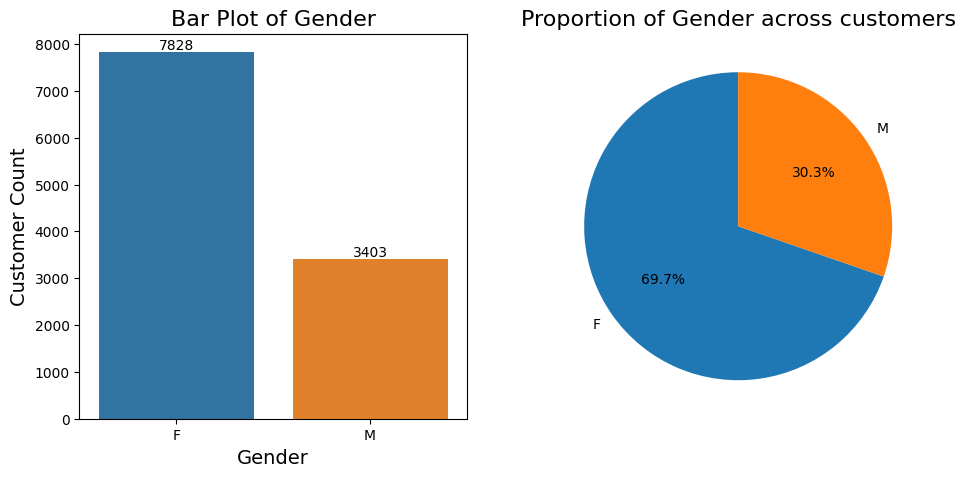

In [ ]:
figure = plt.figure(figsize=[11,5])
plt.subplot(1,2,1)
y = sns.countplot(data=df, x='Gender')

for bars in y.containers:
    y.bar_label(bars)
plt.xlabel('Gender',size=14)
plt.ylabel('Customer Count',size=14)
plt.title('Bar Plot of Gender', size=16)

plt.subplot(1,2,2)
plt.pie(df['Gender'].value_counts().values,labels=df['Gender'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Gender across customers', size=16)
plt.show()

##observation
From above graphs we can see that most of the buyers are females.



# 8.2 Distribution of Amount spent across Gender

<ipython-input-29-a278fc8b8238>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Amount_Gender = df.groupby(by=['Gender'],as_index=False).sum().sort_values(by='Amount', ascending=False) ## sort_values not sorted()


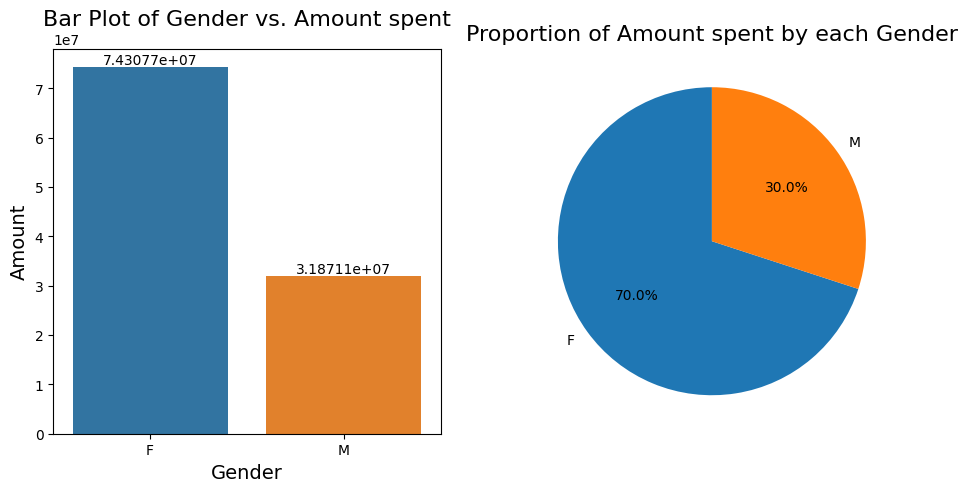

In [ ]:
Amount_Gender = df.groupby(by=['Gender'],as_index=False).sum().sort_values(by='Amount', ascending=False) ## sort_values not sorted()

# The as_index=False parameter is included in the groupby() function. This parameter ensures that
# the "Gender" column is included as a separate column in the resulting DataFrame, rather than being used as the index.
figure = plt.figure(figsize=[11,5])
plt.subplot(1,2,1)
y = sns.barplot(data=Amount_Gender, x='Gender', y='Amount')
for bars in y.containers:
    y.bar_label(bars)
plt.xlabel('Gender',size=14)
plt.ylabel('Amount',size=14)
plt.title('Bar Plot of Gender vs. Amount spent',size=16)

plt.subplot(1,2,2)
plt.pie(Amount_Gender['Amount'], labels=Amount_Gender['Gender'],autopct='%1.1f%%',startangle=90)
plt.title('Proportion of Amount spent by each Gender',size=16)
plt.show()

## Observation
From the above graphs, we can see that the purchasing power of females are greater than men.

#8.3 Distribution of Customers across Age Group

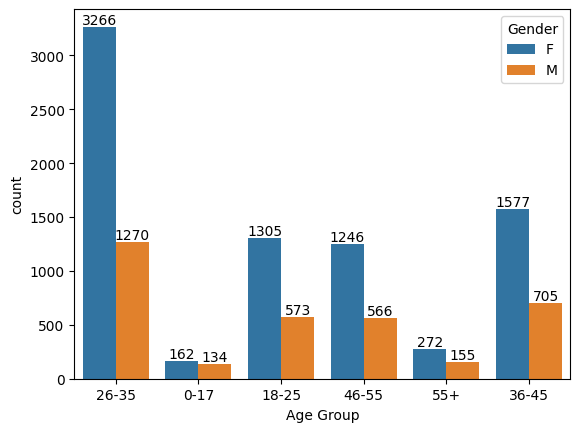

In [ ]:
y = sns.countplot(data=df, x='Age Group', hue='Gender') # hue is important here

for bars in y.containers:
    y.bar_label(bars)

# 8.4 Distribution of Amount spent across Age Group

<ipython-input-31-7377b3ecab64>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Amount_AG = df.groupby(by=['Age Group'],as_index=False).sum().sort_values(by=['Amount'],ascending=False)


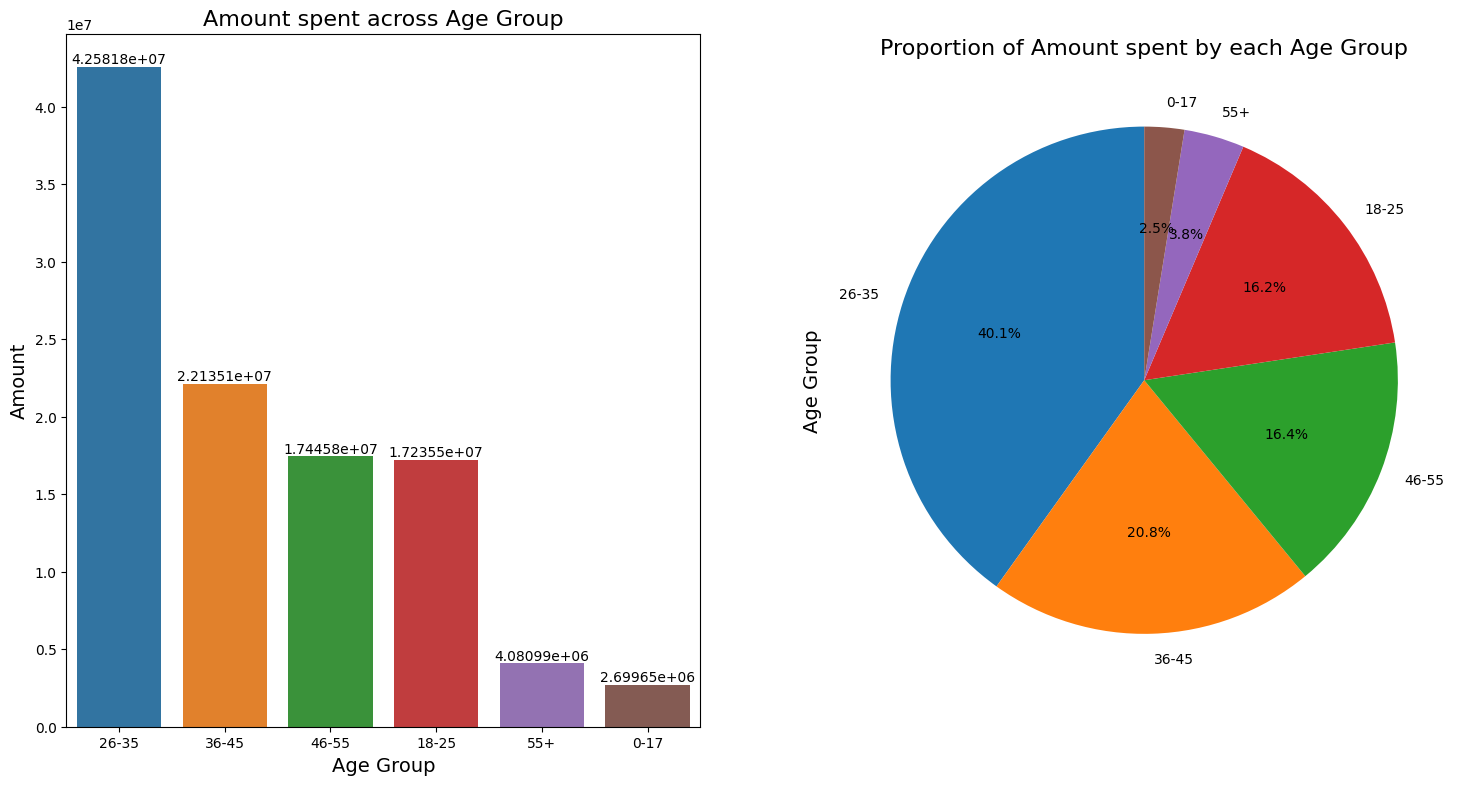

In [ ]:
Amount_AG = df.groupby(by=['Age Group'],as_index=False).sum().sort_values(by=['Amount'],ascending=False)

figure = plt.figure(figsize=[18,9])
plt.subplot(1,2,1)
y = sns.barplot(data=Amount_AG,x='Age Group',y='Amount')
for bars in y.containers:
    y.bar_label(bars)
plt.xlabel('Age Group', size=14)
plt.ylabel('Amount', size=14)
plt.title('Amount spent across Age Group',size=16)

plt.subplot(1,2,2)
plt.pie(Amount_AG['Amount'],labels=Amount_AG['Age Group'],autopct='%1.1f%%',startangle=90)
plt.ylabel('Age Group', size=14)
plt.title('Proportion of Amount spent by each Age Group',size=16)
plt.show()

## Observation
From graphs 8.3, 8.4 we can see that most of the buyers are of age group between 26-35 yrs female



# 8.5 Distribution of Orders across top 10 State

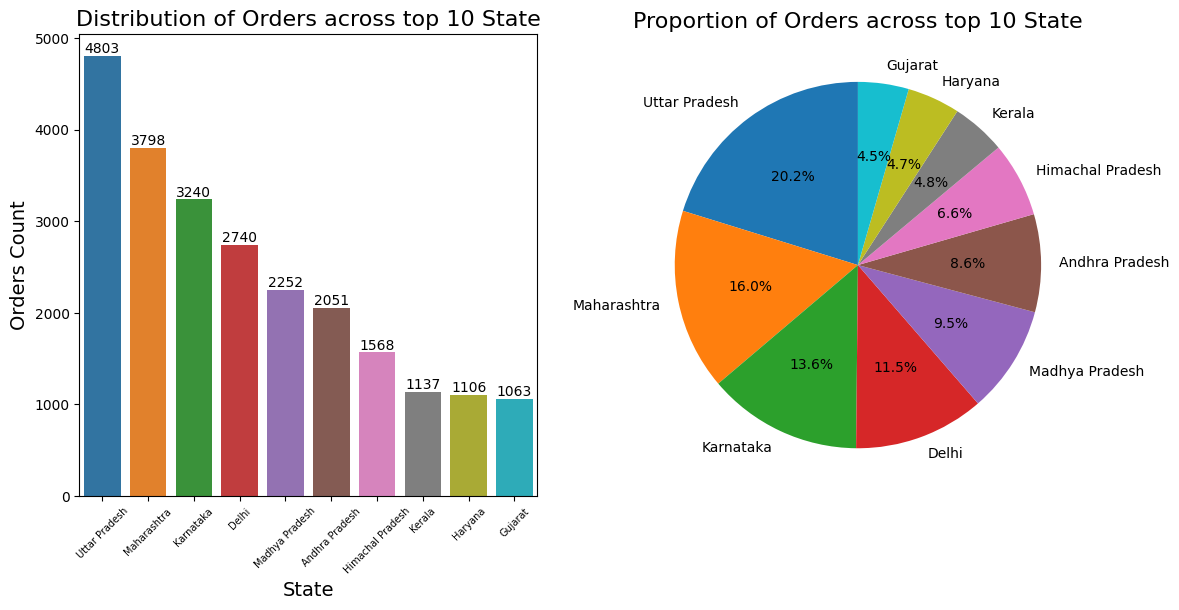

In [ ]:
orders_state = df.groupby(by=['State'],as_index=False)['Orders'].sum().sort_values(by=['Orders'],ascending=False).head(10)

figure = plt.figure(figsize=[13,6])
plt.subplot(1,2,1)
y = sns.barplot(data=orders_state,x='State',y='Orders')
for bars in y.containers:
    y.bar_label(bars)
plt.xlabel('State',size=14)
plt.ylabel('Orders Count',size=14)
plt.title('Distribution of Orders across top 10 State',size=16)
plt.xticks(rotation=45,size=7)

plt.subplot(1,2,2)
plt.pie(orders_state['Orders'],labels=orders_state['State'],autopct='%1.1f%%',startangle=90)
plt.title('Proportion of Orders across top 10 State',size=16)
plt.show()

# 8.6 Distribution of Amount spent across top 10 State

Text(0.5, 1.0, 'Distribution of Amount spent across top 10 State')

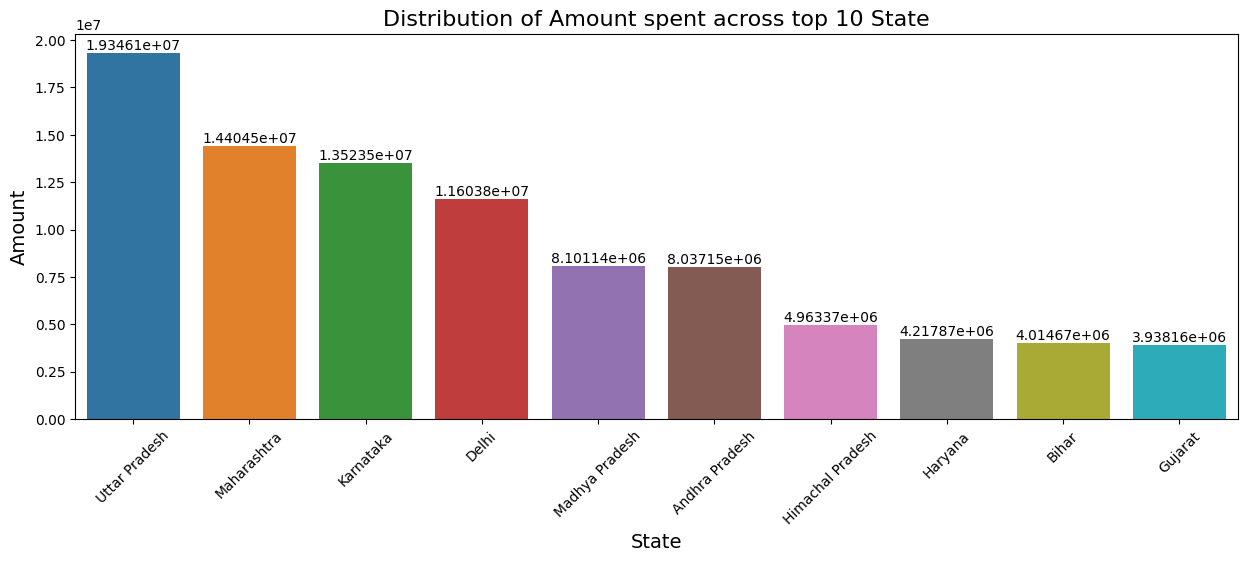

In [ ]:
amount_state = df.groupby(by=['State'],as_index=False)['Amount'].sum().sort_values(by=['Amount'],ascending=False).head(10)

figure = plt.figure(figsize=[15,5])

y = sns.barplot(data=amount_state,x='State',y='Amount')
for bars in y.containers:
    y.bar_label(bars)
plt.xlabel('State',size=14)
plt.xticks(rotation=45)
plt.ylabel('Amount',size=14)
plt.title('Distribution of Amount spent across top 10 State',size=16)

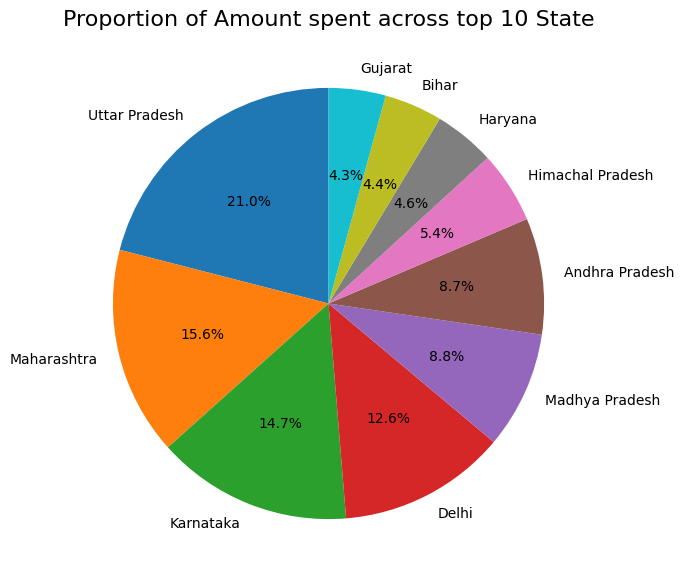

In [ ]:
figure = plt.figure(figsize=[15,7])
plt.pie(amount_state['Amount'],labels=amount_state['State'],autopct='%1.1f%%',startangle=90)
plt.title('Proportion of Amount spent across top 10 State',size=16)
plt.show()

## Observation
From graphs 8.5 and 8.6, we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

# 8.7 Distribution of Customers across Marital_Status

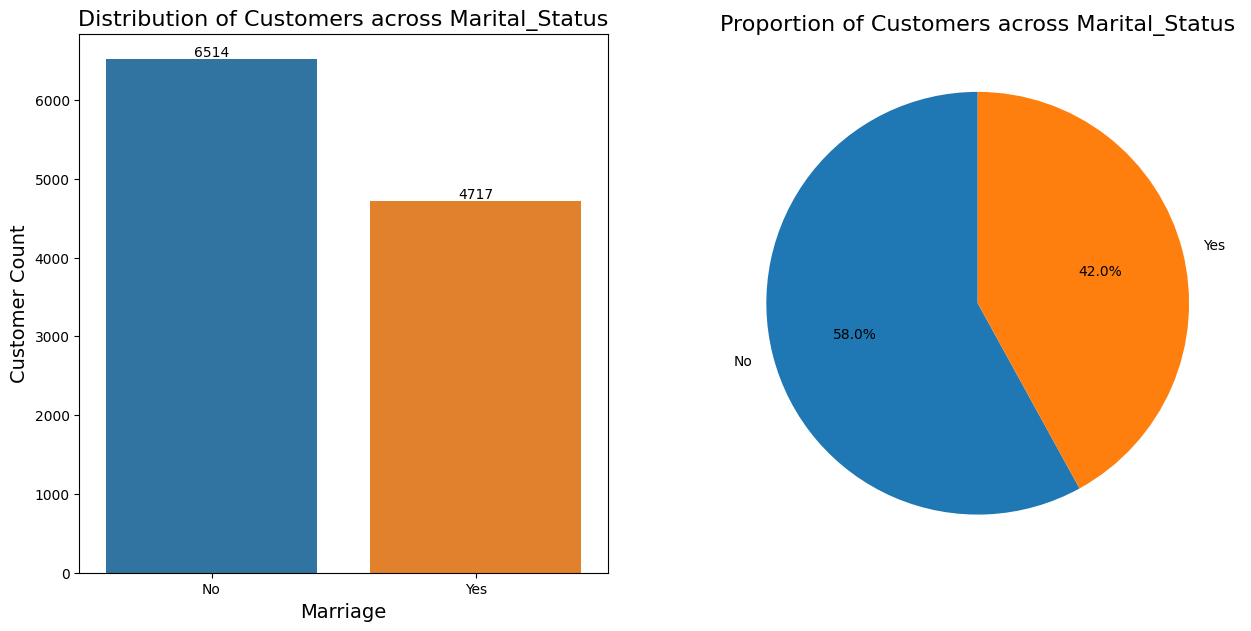

In [ ]:
figure = plt.figure(figsize=[15,7])
plt.subplot(1,2,1)
y = sns.countplot(data=df,x='Marriage')

for bars in y.containers:
  y.bar_label(bars)
plt.xlabel('Marriage',size=14)
plt.ylabel('Customer Count',size=14)
plt.title('Distribution of Customers across Marital_Status',size=16)

plt.subplot(1,2,2)
plt.pie(df['Marriage'].value_counts().values,labels=df['Marriage'].value_counts().index,autopct='%1.1f%%',startangle=90)
plt.title('Proportion of Customers across Marital_Status',size=16)
plt.show()

# 8.8 Distribution of Amount spent across Marital_Status

Text(0.5, 1.0, 'Distribution of Amount spent across Marital_Status')

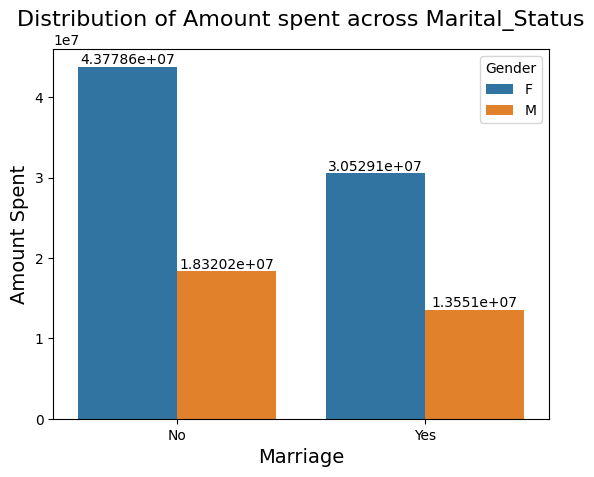

In [ ]:
Amount_MS = df.groupby(by=['Marriage','Gender'],as_index=False)['Amount'].sum().sort_values(by=['Amount'],ascending=False)

y = sns.barplot(data=Amount_MS,x='Marriage',y='Amount',hue='Gender')
for bars in y.containers:
    y.bar_label(bars)
plt.xlabel('Marriage',size=14)
plt.ylabel('Amount Spent',size=14)
plt.title('Distribution of Amount spent across Marital_Status',size=16)

## Observation
From graphs 8.7, 8.8 we can see that most of the buyers are un-married (women) and they have high purchasing power.

# 8.9 Distribution of Customers across Occupation  

Text(0.5, 1.0, 'Distribution of Customers across Occupation')

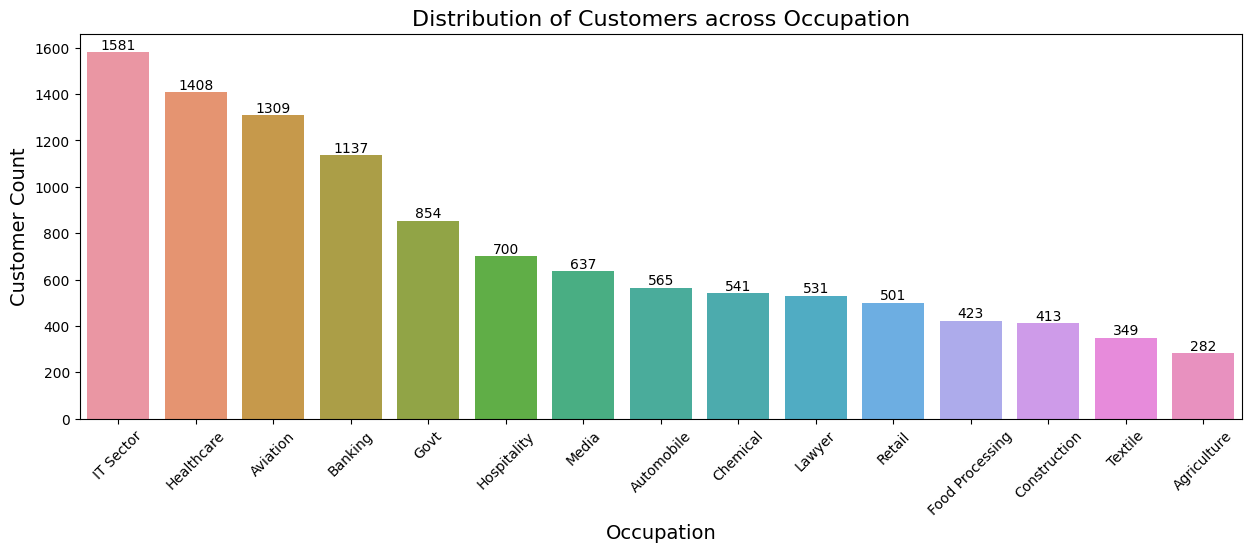

In [ ]:
figure = plt.figure(figsize=[15,5])
a = df.groupby(by=['Occupation'],as_index=False).count().sort_values(by=['User_ID'],ascending=False)
y = sns.barplot(data=a,x='Occupation',y='User_ID')

for bars in y.containers:
    y.bar_label(bars)
plt.xlabel('Occupation',size=14)
plt.xticks(rotation=45)
plt.ylabel('Customer Count',size=14)
plt.title('Distribution of Customers across Occupation',size=16)

#8.10 Distribution of Amount Spent across Occupation

Text(0.5, 1.0, 'Distribution of Amount Spent across Occupation')

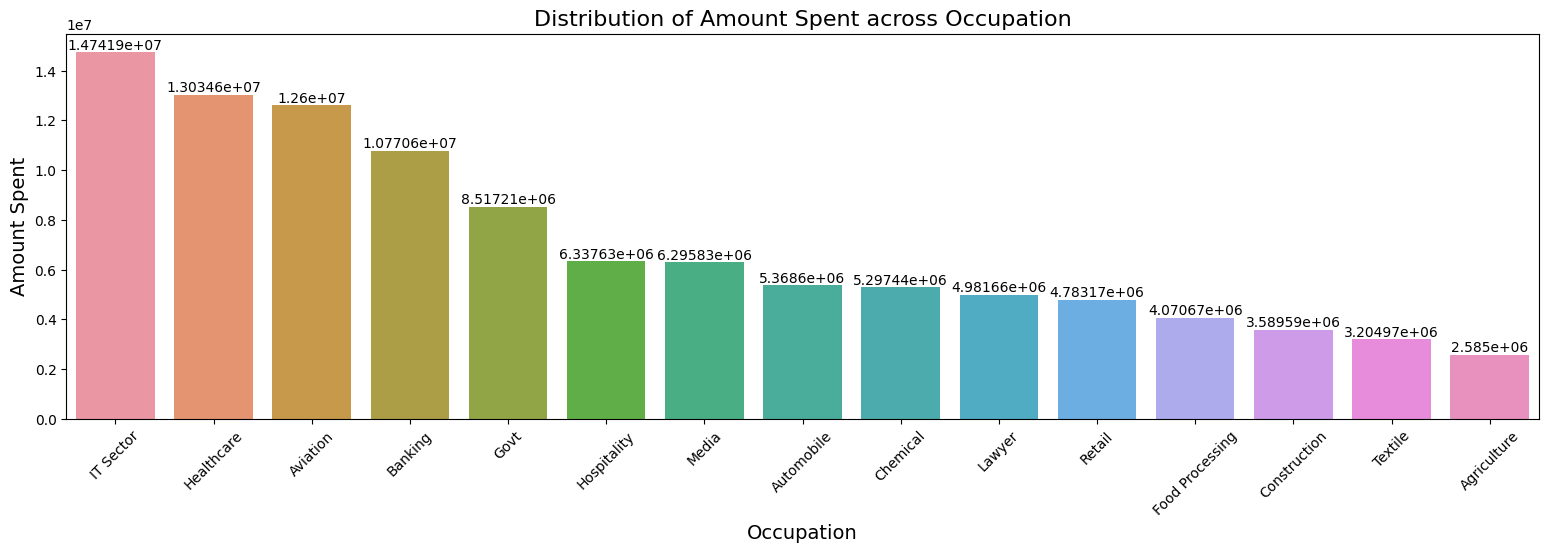

In [ ]:
figure = plt.figure(figsize=[19,5])
a = df.groupby(by=['Occupation'],as_index=False)['Amount'].sum().sort_values(by=['Amount'],ascending=False)
y = sns.barplot(data=a,x='Occupation',y='Amount')

for bars in y.containers:
    y.bar_label(bars,rotation=0)
plt.xlabel('Occupation',size=14)
plt.xticks(rotation=45)
plt.ylabel('Amount Spent',size=14)
plt.title('Distribution of Amount Spent across Occupation',size=16)

## Observation
From graphs 8.9, 8.10 we can see that most of the buyers are working in IT, Healthcare and Aviation secto

# 8.11 Distribution of Customers across Product_Category

Text(0.5, 1.0, 'Distribution of Customers across Product_Category')

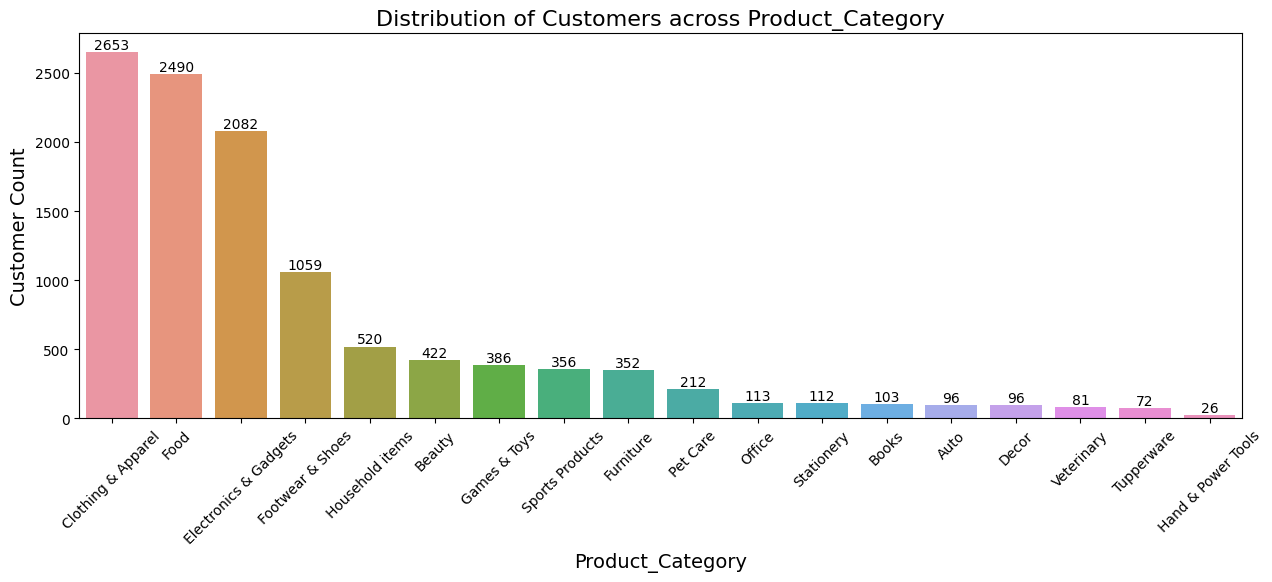

In [ ]:
figure = plt.figure(figsize=[15,5])
a = df.groupby(by=['Product_Category'],as_index=False).count().sort_values(by=['User_ID'],ascending=False)
y = sns.barplot(data=a,x='Product_Category',y='User_ID')

for bars in y.containers:
    y.bar_label(bars)
plt.xlabel('Product_Category',size=14)
plt.xticks(rotation=45)
plt.ylabel('Customer Count',size=14)
plt.title('Distribution of Customers across Product_Category',size=16)

#8.12 Distribution of Amount spent across Product_Category

Text(0.5, 1.0, 'Distribution of Amount Spent across Product_Category')

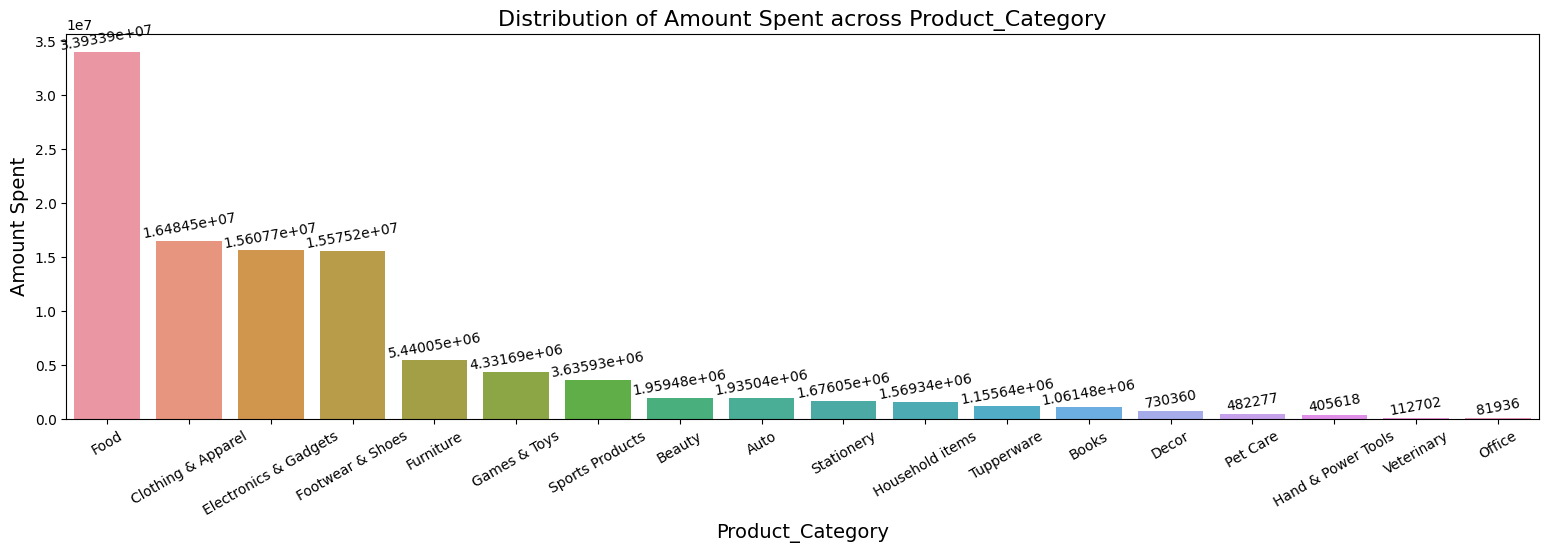

In [ ]:
figure = plt.figure(figsize=[19,5])
a = df.groupby(by=['Product_Category'],as_index=False)['Amount'].sum().sort_values(by=['Amount'],ascending=False)
y = sns.barplot(data=a,x='Product_Category',y='Amount')

for bars in y.containers:
    y.bar_label(bars,rotation=10)
plt.xlabel('Product_Category',size=14)
plt.xticks(rotation=30)
plt.ylabel('Amount Spent',size=14)
plt.title('Distribution of Amount Spent across Product_Category',size=16)

## Observation
From graphs, 8.11, 8.12 we can see that most of the sold products are from Food, Clothing and Electronics category

# Conclusion
The data analysis indicates that the majority of buyers are females, with higher purchasing power than men. Additionally, the age group between 26-35 years comprises a significant portion of female buyers. Furthermore, Uttar Pradesh, Maharashtra, and Karnataka are the top three regions with the highest orders and total sales. Unmarried women exhibit high purchasing power, and the IT, Healthcare, and Aviation sectors have a substantial consumer base. The Food, Clothing, and Electronics categories are the most popular in terms of sold products. This information can be leveraged to target specific customer segments effectively and tailor products and marketing campaigns accordingly.